In [314]:
import pandas as pd
pd.set_option("display.max_columns", None)
import ta
import pandas_ta as taa
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [296]:
volume_btc = yf.download("BTC-USD", start="2015-10-08", end="2023-02-22")

[*********************100%%**********************]  1 of 1 completed


In [297]:
volume_btc.reset_index(inplace=True)
volume_btc.drop(columns=["Open", "High", "Low", "Close", "Adj Close"], inplace=True)
volume_btc.loc[volume_btc["Date"] == "2015-10-08", "Date"] += pd.to_timedelta("13:41:00")


In [ ]:
df = pd.read_csv("btc_minute_data.csv")

In [299]:
df.drop(columns=["Volume USD","Symbol","Timestamp"],inplace=True)
df.drop(df.tail(1).index, inplace=True)
df["Date"] = pd.to_datetime(df["Date"])

In [300]:
df = pd.merge(df, volume_btc[["Date", "Volume"]], on="Date", how="left")
df["Volume"].bfill(inplace=True)
df = df.sort_values(by="Date", ascending=True)
df.reset_index(inplace=True,drop=True)
df["Volume BTC"] = df["Volume BTC"].replace(0, pd.NA)
df["Volume BTC"].ffill(inplace=True)

C:\Users\Hugo\AppData\Local\Temp\ipykernel_1268\654481120.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Volume"].bfill(inplace=True)
C:\Users\Hugo\AppData\Local\Temp\ipykernel_1268\654481120.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[c

In [301]:
df["vwap"] = ta.volume.volume_weighted_average_price(high=df["High"], low=df["Low"], close=df["Close"], volume=df["Volume"])
df.dropna(inplace=True)

In [302]:
df["short_mavg"] = df["Close"].rolling(window=10, min_periods=1, center=False).mean()
df["long_mavg"] = df["Close"].rolling(window=60, min_periods=1, center=False).mean()
df["signal"] = np.where(df["short_mavg"] > df["long_mavg"], 1.0, 0.0)

In [303]:
#calculation of exponential moving average
df["EMA10"] = taa.ema(df["Close"], length=10)
df["EMA30"] = taa.ema(df["Close"], length=30)
df["EMA200"] = taa.ema(df["Close"], length=200)


#calculation of rate of change
df["ROC10"] = taa.roc(df["Close"], length=10)
df["ROC30"] = taa.roc(df["Close"], length=30)


#Calculation of price momentum
df["MOM10"] = taa.mom(df["Close"], window=10)
df["MOM30"] = taa.mom(df["Close"], window=30)


#calculation of relative strength index
df["RSI10"] = taa.rsi(df["Close"], length=10)
df["RSI30"] = taa.rsi(df["Close"], length=30)
df["RSI200"] = taa.rsi(df["Close"], length=200)


#calculation of stochastic osillator.
def STOK(close, low, high, n): 
 STOK = ((close - low.rolling(n).min()) / (high.rolling(n).max() - low.rolling(n).min())) * 100
 return STOK

def STOD(close, low, high, n):
 STOK = ((close - low.rolling(n).min()) / (high.rolling(n).max() - low.rolling(n).min())) * 100
 STOD = STOK.rolling(3).mean()
 return STOD

df["%K10"] = STOK(df["Close"], df["Low"], df["High"], 10)
df["%D10"] = STOD(df["Close"], df["Low"], df["High"], 10)
df["%K30"] = STOK(df["Close"], df["Low"], df["High"], 30)
df["%D30"] = STOD(df["Close"], df["Low"], df["High"], 30)
df["%K200"] = STOK(df["Close"], df["Low"], df["High"], 200)
df["%D200"] = STOD(df["Close"], df["Low"], df["High"], 200)
#Calculation of moving average
def MA(df, n):
    MA = pd.Series(df["Close"].rolling(n, min_periods=n).mean(), name="MA_" + str(n))
    return MA
df["MA21"] = MA(df, 10)
df["MA63"] = MA(df, 30)
df["MA252"] = MA(df, 200)
df.head(20)

,Date,Open,High,Low,Close,Volume BTC,Volume,vwap,short_mavg,long_mavg,signal,EMA10,EMA30,EMA200,ROC10,ROC30,MOM10,MOM30,RSI10,RSI30,RSI200,%K10,%D10,%K30,%D30,%K200,%D200,MA21,MA63,MA252
13,2015-10-08 13:54:00,245.0,245.0,245.0,245.0,0.408163,18515300.0,243.630476,245.000000,245.000000,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14,2015-10-08 13:55:00,245.0,245.0,245.0,245.0,0.408163,18515300.0,243.787619,245.000000,245.000000,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15,2015-10-08 13:56:00,245.0,245.0,245.0,245.0,0.408163,18515300.0,243.934048,245.000000,245.000000,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16,2015-10-08 13:57:00,245.0,245.0,245.0,245.0,0.408163,18515300.0,244.080000,245.000000,245.000000,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17,2015-10-08 13:58:00,245.0,245.0,245.0,245.0,0.408163,18515300.0,244.225714,245.000000,245.000000,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18,2015-10-08 13:59:00,245.0,245.0,245.0,245.0,0.408163,18515300.0,244.371429,245.000000,245.000000,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19,2015-10-08 14:00:00,245.0,245.0,245.0,245.0,0.408163,18515300.0,244.517143,245.000000,245.000000,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20,2015-10-08 14:01:00,245.0,245.0,245.0,245.0,0.408163,18515300.0,244.662857,245.000000,245.000000,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21,2015-10-08 14:02:00,245.0,245.0,244.5,244.5,0.987223,18515300.0,244.784762,244.944444,244.944444,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
22,2015-10-08 14:03:00,244.5,244.5,244.5,244.5,0.987223,18515300.0,244.892857,244.900000,244.900000,0.0,244.900000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,244.90,NaN,NaN


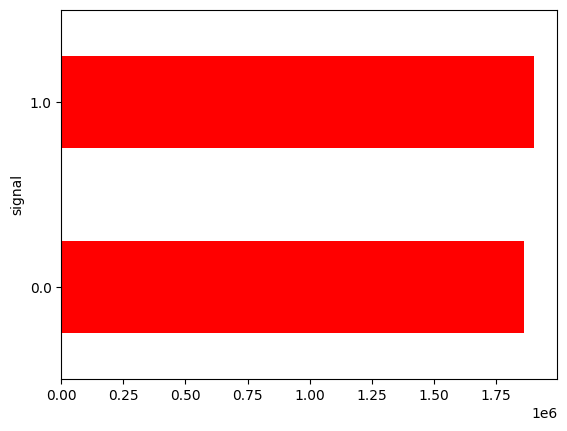

In [304]:
fig = plt.figure()
plot = df.groupby(["signal"]).size().plot(kind="barh", color="red")
plt.show()

In [305]:
df.drop(columns=["High","Low","Open","short_mavg","long_mavg","Volume"],inplace=True)
df.dropna(inplace=True)

In [306]:
df

,Date,Close,Volume BTC,vwap,signal,EMA10,EMA30,EMA200,ROC10,ROC30,MOM10,MOM30,RSI10,RSI30,RSI200,%K10,%D10,%K30,%D30,%K200,%D200,MA21,MA63,MA252
214,2015-10-08 17:15:00,244.02,0.162588,244.094762,0.0,244.056360,244.200674,244.761912,0.000000,-0.114613,0.00,0.00,34.166109,27.215991,31.386212,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,244.048,244.183333,244.76710
215,2015-10-08 17:16:00,244.02,0.162588,244.078333,0.0,244.049749,244.189018,244.754530,0.000000,-0.114613,0.00,0.00,34.166109,27.215991,31.386212,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,244.048,244.174000,244.76220
216,2015-10-08 17:17:00,244.02,0.162588,244.061905,0.0,244.044340,244.178114,244.747221,-0.114613,-0.114613,-0.28,-0.28,34.166109,27.215991,31.386212,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,244.020,244.164667,244.75730
240,2015-10-08 17:41:00,244.50,0.007812,244.097143,0.0,244.212954,244.127650,244.604287,0.196705,0.196705,0.48,0.48,96.505881,69.135175,45.170727,100.000000,100.000000,100.000000,100.000000,48.979592,42.176871,244.144,244.061333,244.68990
241,2015-10-08 17:42:00,244.50,0.007812,244.131429,1.0,244.265145,244.151673,244.603249,0.196705,0.196705,0.48,0.48,96.505881,69.135175,45.170727,100.000000,100.000000,100.000000,100.000000,48.979592,48.979592,244.192,244.077333,244.68990
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3766757,2023-02-21 00:29:00,24812.25,0.090675,24805.822619,1.0,24810.096598,24810.259226,24788.558559,0.067109,-0.102063,16.64,16.64,51.894661,52.311021,50.427178,64.747082,57.029831,33.494364,29.502147,81.895890,80.809132,24809.321,24816.564667,24773.36620
3766758,2023-02-21 00:30:00,24818.09,0.002203,24806.537857,1.0,24811.549944,24810.764438,24788.852404,0.090661,-0.109437,22.48,22.48,57.790385,53.714070,50.577601,87.470817,68.456550,45.258707,35.416349,85.095890,82.418265,24811.569,24815.658333,24773.49485
3766759,2023-02-21 00:31:00,24821.96,0.090640,24808.132381,1.0,24813.442682,24811.486732,24789.181833,0.106269,-0.093861,26.35,26.35,61.284111,54.629137,50.677277,100.000000,84.072633,53.050131,43.934401,87.216438,84.736073,24814.204,24814.881000,24773.65460
3766760,2023-02-21 00:32:00,24859.34,0.103099,24811.743571,1.0,24821.787649,24814.574039,24789.879924,0.182235,0.097967,45.22,45.22,79.497039,62.113290,51.624387,100.000000,95.823606,100.000000,66.102946,100.000000,90.770776,24818.726,24815.692000,24774.02940


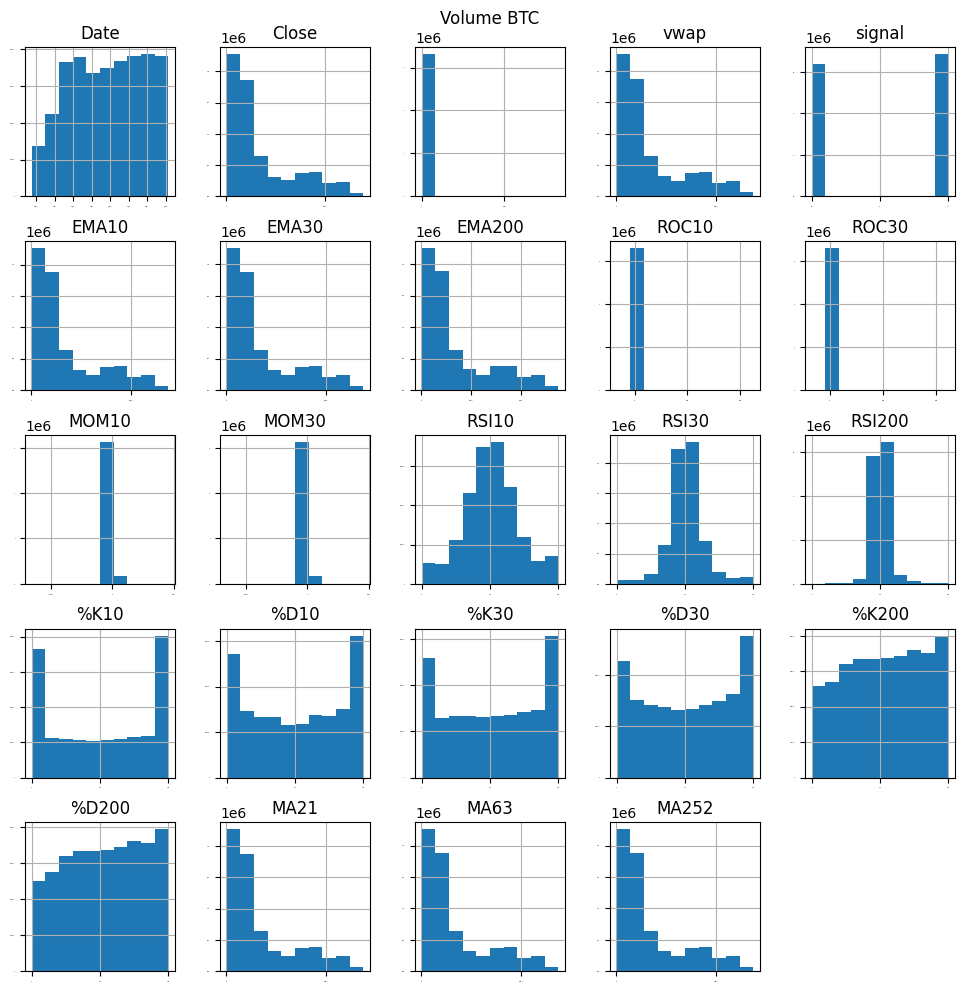

In [312]:
df.hist(sharex=False, sharey=False, xlabelsize=1, ylabelsize=1, figsize=(12,12))
plt.show()

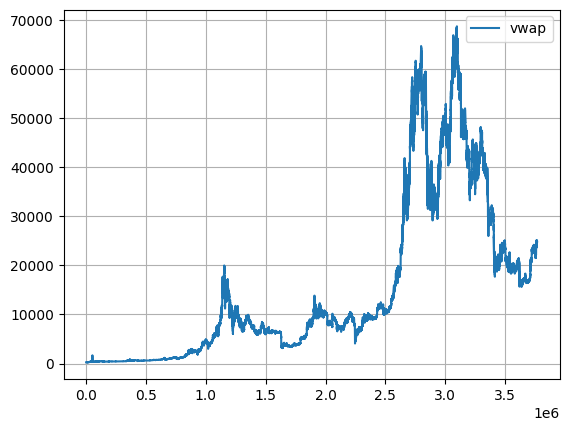

In [313]:
df[["vwap"]].plot(grid=True)
plt.show()

<Axes: title={'center': 'Correlation Matrix'}>

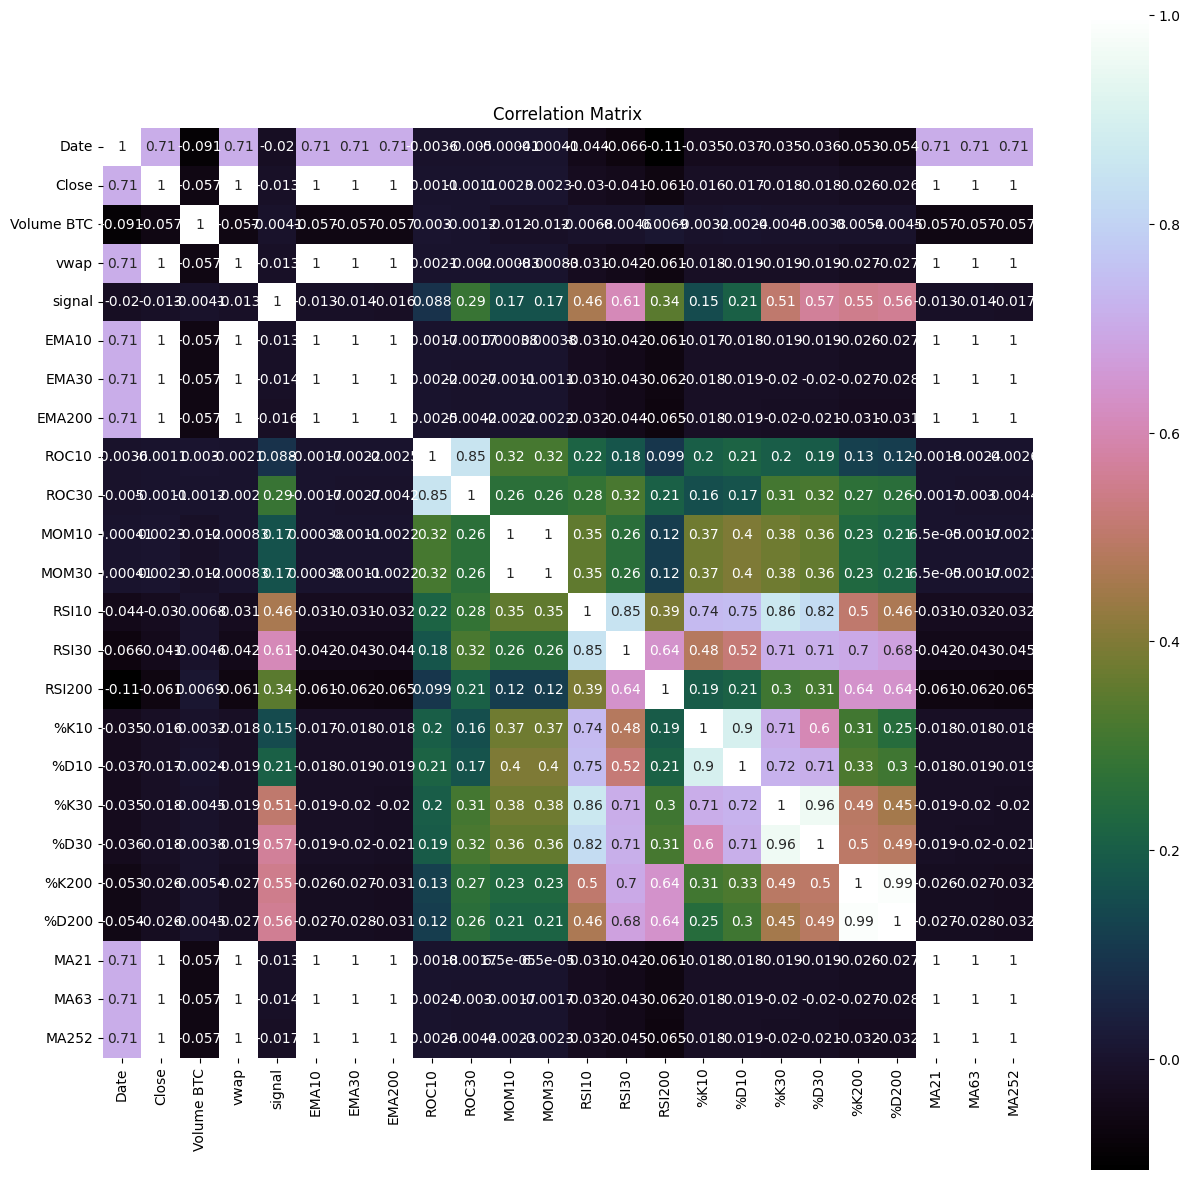

In [315]:
# correlation
correlation = df.corr()
plt.figure(figsize=(15,15))
plt.title("Correlation Matrix")
sns.heatmap(correlation, vmax=1, square=True,annot=True,cmap="cubehelix")

In [317]:

df.dtypes,df.isna().sum(),df.duplicated().sum()


(Date          datetime64[ns]
 Close                float64
 Volume BTC           float64
 vwap                 float64
 signal               float64
 EMA10                float64
 EMA30                float64
 EMA200               float64
 ROC10                float64
 ROC30                float64
 MOM10                float64
 MOM30                float64
 RSI10                float64
 RSI30                float64
 RSI200               float64
 %K10                 float64
 %D10                 float64
 %K30                 float64
 %D30                 float64
 %K200                float64
 %D200                float64
 MA21                 float64
 MA63                 float64
 MA252                float64
 dtype: object,
 Date          0
 Close         0
 Volume BTC    0
 vwap          0
 signal        0
 EMA10         0
 EMA30         0
 EMA200        0
 ROC10         0
 ROC30         0
 MOM10         0
 MOM30         0
 RSI10         0
 RSI30         0
 RSI200        0
 %K10    

In [318]:
df.to_pickle("df.pkl")

In [319]:
df

,Date,Close,Volume BTC,vwap,signal,EMA10,EMA30,EMA200,ROC10,ROC30,MOM10,MOM30,RSI10,RSI30,RSI200,%K10,%D10,%K30,%D30,%K200,%D200,MA21,MA63,MA252
214,2015-10-08 17:15:00,244.02,0.162588,244.094762,0.0,244.056360,244.200674,244.761912,0.000000,-0.114613,0.00,0.00,34.166109,27.215991,31.386212,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,244.048,244.183333,244.76710
215,2015-10-08 17:16:00,244.02,0.162588,244.078333,0.0,244.049749,244.189018,244.754530,0.000000,-0.114613,0.00,0.00,34.166109,27.215991,31.386212,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,244.048,244.174000,244.76220
216,2015-10-08 17:17:00,244.02,0.162588,244.061905,0.0,244.044340,244.178114,244.747221,-0.114613,-0.114613,-0.28,-0.28,34.166109,27.215991,31.386212,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,244.020,244.164667,244.75730
240,2015-10-08 17:41:00,244.50,0.007812,244.097143,0.0,244.212954,244.127650,244.604287,0.196705,0.196705,0.48,0.48,96.505881,69.135175,45.170727,100.000000,100.000000,100.000000,100.000000,48.979592,42.176871,244.144,244.061333,244.68990
241,2015-10-08 17:42:00,244.50,0.007812,244.131429,1.0,244.265145,244.151673,244.603249,0.196705,0.196705,0.48,0.48,96.505881,69.135175,45.170727,100.000000,100.000000,100.000000,100.000000,48.979592,48.979592,244.192,244.077333,244.68990
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3766757,2023-02-21 00:29:00,24812.25,0.090675,24805.822619,1.0,24810.096598,24810.259226,24788.558559,0.067109,-0.102063,16.64,16.64,51.894661,52.311021,50.427178,64.747082,57.029831,33.494364,29.502147,81.895890,80.809132,24809.321,24816.564667,24773.36620
3766758,2023-02-21 00:30:00,24818.09,0.002203,24806.537857,1.0,24811.549944,24810.764438,24788.852404,0.090661,-0.109437,22.48,22.48,57.790385,53.714070,50.577601,87.470817,68.456550,45.258707,35.416349,85.095890,82.418265,24811.569,24815.658333,24773.49485
3766759,2023-02-21 00:31:00,24821.96,0.090640,24808.132381,1.0,24813.442682,24811.486732,24789.181833,0.106269,-0.093861,26.35,26.35,61.284111,54.629137,50.677277,100.000000,84.072633,53.050131,43.934401,87.216438,84.736073,24814.204,24814.881000,24773.65460
3766760,2023-02-21 00:32:00,24859.34,0.103099,24811.743571,1.0,24821.787649,24814.574039,24789.879924,0.182235,0.097967,45.22,45.22,79.497039,62.113290,51.624387,100.000000,95.823606,100.000000,66.102946,100.000000,90.770776,24818.726,24815.692000,24774.02940
